## Ejercicio Práctico: Random Forest

### Paso 1: Importar las librerias

In [8]:
# Libreria para operaciones matemáticas o estadísticas
import numpy as np
# Libreria para el manejo de datos
import pandas as pd
# Librerías para gráficas
import seaborn as sb
import matplotlib.pyplot as plt
# Libreria para dividir los datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
# Libreria para Random Forest
from sklearn.ensemble import RandomForestRegressor
# Libreria para las métricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Librerias para Hiperparámetros
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### Paso 2: Cargar los datos a un DataFrame

In [9]:
# Se cargan los datos de entrada
data = pd.read_csv("data/2.3-glifosato.csv", sep=";")
# Se observa la cantidad de registros y columnas del archivo
data.shape

(626, 9)

### Paso 3: Preprocesamiento de los datos

In [10]:
# Se buscan registros NaN para eliminarlos
print('Columna           Cantidad NaN')
print(data.isnull().sum(axis = 0))
print(data.shape)

Columna           Cantidad NaN
date(m/d/y)        0
time               0
day                0
concentration      0
chloride(mg/L)     0
DO(mg/L)           0
ORP(mV)            0
pH                 0
turbidity(NTU+)    0
dtype: int64
(626, 9)


In [11]:
# Se eliminan los registros NaN del DataFrame
#data = data.dropna()
#data.shape

##### Nota: Como no existen registros NaN no es necesario utilizar 'dropna()'

In [12]:
# Se observan los primeros registros
data.head()

,date(m/d/y),time,day,concentration,chloride(mg/L),DO(mg/L),ORP(mV),pH,turbidity(NTU+)
0,25/01/05,12.30,1,0.0,17.02,13.17,747,8.68,0.1
1,25/01/05,12.31,1,0.0,17.12,13.20,747,8.67,0.1
2,25/01/05,12.32,1,0.0,17.12,13.25,747,8.68,0.1
3,25/01/05,12.33,1,0.0,17.11,13.19,747,8.68,0.1
4,25/01/05,12.34,1,0.0,17.03,13.20,747,8.68,0.1


In [13]:
# Se observan las estadísticas de los datos, para valores numéricos
data.describe()

,time,day,concentration,chloride(mg/L),DO(mg/L),ORP(mV),pH,turbidity(NTU+)
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,13.869968,1.504792,1.161981,17.323882,13.348083,739.704473,8.652077,0.068371
std,1.857436,0.500377,1.164567,0.511636,0.133306,7.442400,0.091153,0.101617
min,10.050000,1.000000,0.000000,16.550000,12.980000,717.000000,8.240000,-0.100000
25%,12.562500,1.000000,0.000000,16.880000,13.280000,737.000000,8.650000,0.000000
50%,14.120000,2.000000,0.400000,17.105000,13.400000,740.000000,8.670000,0.000000
75%,15.287500,2.000000,1.500000,17.880000,13.450000,746.000000,8.700000,0.100000
max,17.300000,2.000000,3.000000,18.350000,13.530000,753.000000,8.730000,0.500000


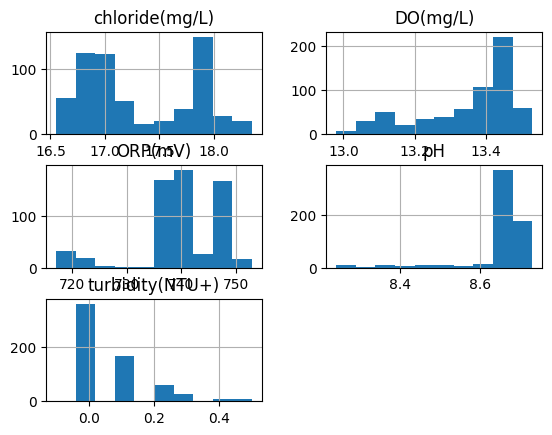

In [14]:
# Visualizo las características de la entrada en un histograma, sin las columnas: time, day, concentration
data.drop(['time','day','concentration'], axis=1).hist()
plt.rcParams['figure.figsize'] = (10,9)
plt.show()

### Paso 4: Predicción con mejores características y Random Forest

In [15]:
# Se seleccionan las mejores características por su peso: ORP(mV), DO(mg/L), pH, chloride(mg/L)
features = ['ORP(mV)', 'DO(mg/L)', 'pH', 'chloride(mg/L)']
X = data[features]
# Variable Objetivo
y = data['concentration']

# Se dividen los datos para el entrenamiento (70% entrenamiento y 30% pruebas)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 1)

# Se crea el modelo con Random Forest
rfr = RandomForestRegressor()
# Se entrena el modelo
rfr.fit(X_train, y_train)
# Se genera la predicción
prediccion = rfr.predict(X = X_test)

# Métricas
# Se utiliza la métrica: R2
print('R2-árbol de regresión:',  r2_score(y_test, prediccion))
# Se utiliza la métrica: raíz del error cuadrático medio (rmse)
rmse = mean_squared_error( y_true  = y_test, y_pred  = prediccion, squared = False)
print('RMSE-árbol de regresión:', rmse)
# Se utiliza la métrica: MAE
mae = mean_absolute_error(y_test, prediccion)
print('MAE-árbol de regresión:', mae)

R2-árbol de regresión: 0.770896831372102
RMSE-árbol de regresión: 0.5732987484527636
MAE-árbol de regresión: 0.2940998986828775


##### Nota: A partir de las mejores características se genera la predicción. El modelo alcanzó 0.77 para la métrica R2, pero se puede mejorar con Hiperparámetros

### Paso 5: Hiperparámetros para Random Forest

In [19]:
# RamdomForestRegressor: Ajuste Hiperparámetros (Random Search)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rfr = RandomForestRegressor()

# Número de árboles en un bosque aleatorio
n_estimators = [int(x) for x in np.linspace(start=20, stop=200, num = 10)]
# Número de características a considerar en cada división
max_features = [1.0]
# Número máximo de niveles en el árbol
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Número mínimo de muestras requeridas para dividir un nodo
min_samples_split = [2, 5, 10, 15, 20]
# Número mínimo de muestras requeridas en cada nodo hoja
min_samples_leaf = [1, 2, 4, 6]
# Método de selección de muestras para entrenar cada árbol
bootstrap = [True, False]
grid = dict(n_estimators=n_estimators,
            max_features=max_features,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            bootstrap=bootstrap)
cvFold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# Hiperparámatros con Random Search
randomSearch = RandomizedSearchCV(estimator= rfr,
                                  n_jobs=-1,
                                  cv=cvFold,
                                  param_distributions=grid,
                                  scoring="neg_mean_squared_error")
searchResults = randomSearch.fit(X_train, y_train.ravel())


# Se extraen las mejores características para evaluar el modelo
bestModel = searchResults.best_estimator_

print("Mejores Parametros (RandomSearch):", bestModel)
print("-----------------------------------------------------------")

# Se crea un objeto con los mejores ajustes de Hiperparámetros
RFR_AH = bestModel

# Se entrena el modelo
RFR_AH.fit(X_train, y_train)

# Se entrena el modelo con los mejores parámetros
predictRFR_AH = RFR_AH.predict(X = X_test)

#R2
r2RFR_AH= r2_score(y_test, predictRFR_AH)
#RMSE
rmseRFR_AH = mean_squared_error(y_true = y_test, y_pred = predictRFR_AH, squared=False)
#MAE
maeRFR_AH = mean_absolute_error(y_test, predictRFR_AH)

print('R2 = %.2f' % r2RFR_AH)
print('RMSE = %.2f' % rmseRFR_AH)
print('MAE = %.2f' % maeRFR_AH)

Mejores Parametros (RandomSearch): RandomForestRegressor(max_depth=80, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=140)
-----------------------------------------------------------
R2 = 0.79
RMSE = 0.55
MAE = 0.32


##### Nota: Al aplicar Hiperparámetros el modelo mejoró en 2% en la métrica R2 al pasar del 0.77 a 0.79.